# Klasifikasi menggunakan KNN

Notebook ini merupakan bagian dari buku **Fundamental Machine Learning menggunakan Python** oleh **Fahmi Noor Fiqri**. Notebook ini berisi contoh kode untuk **Bab 7 - Klasifikasi.**

## Data Ingestion

In [1]:
# Mengimpor library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Membaca data dari file CSV
df = pd.read_csv(r'../datasets/iris.csv')

In [3]:
# Menampilkan statistik deskriptif dari data
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# Menampilkan sampel 5 data teratas
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


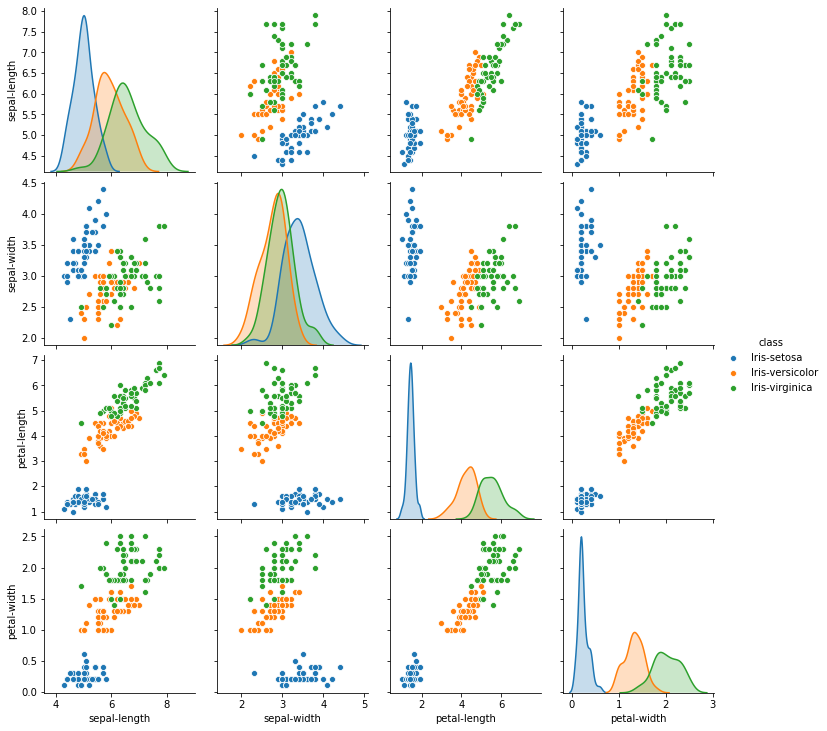

In [5]:
# Membuat pairplot (diagram pencar dan distribusi data) antar variabel
sns.pairplot(df, hue='class')

## Preprocessing

In [6]:
# Memisahkan features dan label
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

In [7]:
# Membagi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

In [8]:
# Melakukan label encoding
lb = LabelEncoder()
lb.fit(y_train)

y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

In [9]:
# Standarisasi
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Rata-Rata Error')

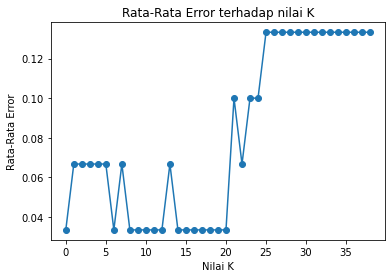

In [10]:
# Menentukan nilai k dari Mean Average Error
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)

    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure()
plt.plot(error, marker='o')
plt.title('Rata-Rata Error terhadap nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Rata-Rata Error')

## Training

In [11]:
# Membuat model dengan data latih dan k = 6
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

## Evaluation

In [12]:
# Melakukan prediksi dengan data uji dan menampilkan statistik klasifikasi
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=lb.classes_))

precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



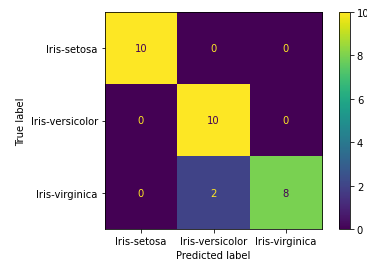

In [13]:
# Menampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=lb.classes_).plot()

## Prediction

In [14]:
# Prediksi probabilitas
pred_input = [[3.0, 1.2, 2.4, 1.1]]
classifier.predict_proba(pred_input)

array([[0., 0., 1.]])

In [15]:
# Prediksi kelas
classifier.predict(pred_input)

array([2])

In [17]:
# Kembalikan kelas menjadi teks
pred_result = classifier.predict(pred_input)
lb.inverse_transform(pred_result)

array(['Iris-virginica'], dtype=object)